In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.cross_validation import train_test_split

datadir = '../PAMAP2_Dataset/'

list_file = ['Protocol/subject101.dat',\
             'Protocol/subject102.dat',\
             'Protocol/subject103.dat',\
             'Protocol/subject104.dat',\
             'Protocol/subject105.dat',\
             'Protocol/subject106.dat',\
             'Protocol/subject107.dat',\
             'Protocol/subject108.dat',\
             'Protocol/subject109.dat']

###################################################################################
# Selecting the features from the data sets 
# that are going to be used in the analysis.
#
# Correspondence between column index and feature 
#
# 1 : activity
# 2 : heart rate
# 3 : hand temp
# 4,5,6 : 3D acceleration measured at hand, 16g scale
# 10,11,12 : gyroscopic data
#
features = [0,1,2,3,4,5,6,10,11,12]
data_labels = ['time',
               'activity', 
               'heart_rate', 
               'hand_temp',
               'ac_16g_x',
               'ac_16g_y',
               'ac_16g_z',
               'g_x',
               'g_y',
               'g_z']

# Load first data file and initialize dataframe

isubject = 1
df = pd.read_table(datadir+list_file[0],header=None,delim_whitespace=True)
#
print 'Done reading data file ', datadir+list_file[0]
#
df = df[features].dropna()
df.columns = data_labels
df.loc[:,'subject'] = isubject
df.loc[:,'intensity'] = df['activity'][:]
df1=df

# Load remaining data files and concatenate with initial dataframe
for lfile in list_file[1:]:
    datafile = datadir+lfile
    isubject = isubject + 1
    print 'Done reading data file ', datafile
    df = pd.read_table(datafile,header=None,delim_whitespace=True)
    df = df[features].dropna()
    df.columns = data_labels
    df.loc[:,'subject'] = isubject
    df.loc[:,'intensity'] = df['activity'][:]
    df1 = pd.concat([df1,df])

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Done reading data file  ../PAMAP2_Dataset/Protocol/subject101.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject102.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject103.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject104.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject105.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject106.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject107.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject108.dat
Done reading data file  ../PAMAP2_Dataset/Protocol/subject109.dat


In [2]:
# Visual inspection of dataframe
#pd.set_option('display.max_rows', 100)
#df1

In [3]:
#####################################################################
# Create the dataframe that will be used to generate the machine
# learning model.
#
# Retain for analysis the rows where the activity index is different 
# than zero. Index zero corresponds to transient activity times in 
# the observations that should be discarded in the analysis.
#
df_analysis = df1[df1.activity != 0][:]

#####################################################################
#
# Relabel types of activities in terms of a label that specifies
# the intensity of that activity.
#
# Labels specifying activity intensities
target_labels = ['minimum','low','medium','high']
#
#
######################################################################
# Dictionary for the assign the activity intensity level
# to each of the 24 activities recorded
# 
conversion_dict = {'minimum':[1,2,3,9,10,11,18],
                   'low': [17,13,19],
                   'medium': [4,12,16],
                   'high':[5,6,7,20,24]}

for tl in target_labels:
    lact = conversion_dict[tl]
    for iactivity in lact:       
        df_analysis.loc[df_analysis['activity'] == iactivity,'intensity']=tl

In [4]:
# Inspection of analysis dataframe
#
pd.set_option('display.max_rows', 50)
df_analysis

,time,activity,heart_rate,hand_temp,ac_16g_x,ac_16g_y,ac_16g_z,g_x,g_y,g_z,subject,intensity
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.092590,-0.069961,-0.018328,0.004582,1,minimum
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.552190,-0.431227,0.002685,-0.062964,1,minimum
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.093090,0.075692,-0.030792,0.005246,1,minimum
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.171570,-0.259058,-0.267895,-0.038533,1,minimum
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.786710,0.377115,-0.023688,-0.020670,1,minimum
2987,38.25,1,101.0,30.3750,2.549540,7.63122,5.556230,-0.487667,-0.019958,-0.089500,1,minimum
2998,38.36,1,101.0,30.3750,2.824070,6.14490,5.065020,-0.781563,0.198873,-0.213285,1,minimum
3009,38.47,1,101.0,30.3750,2.736260,7.94195,6.520170,-0.472414,0.279868,0.036526,1,minimum
3020,38.58,1,101.0,30.3750,2.388940,7.48830,6.401030,0.358279,1.046610,0.346204,1,minimum
3031,38.69,1,101.0,30.3750,1.813200,6.85639,7.356720,0.360442,1.287300,0.129226,1,minimum


In [5]:
df_analysis.loc[:,'ac_16g_norm']=df_analysis[['ac_16g_x','ac_16g_y','ac_16g_z']].apply(lambda x: np.linalg.norm(x), axis=1)

In [6]:
#####################################################################
#
# Prepare dataframe for machine learning analys
#
# * Extract one data row every five to build the model
# * Shuffle the data rows in the machine learning dataframe  
#

df_ml = df_analysis[::5].sample(frac=1,random_state=32047)
#df_ml

In [7]:
##################################################################### 
# Prepare the target labels
#
intesity_labels = df_ml['intensity']
# 
# Extract the unique labels
labels = list(set(intesity_labels))
print "Unique intensity labels : ", labels

# Prepare the array of labels for the machine learning data set
target_labels = np.array([labels.index(x) for x in intesity_labels])

# Prepare the array of target features for the machine learning data set
target_features = df_ml[['hand_temp','heart_rate','ac_16g_x','ac_16g_y','ac_16g_z','g_x','g_y','g_z']].as_matrix()

Unique intensity labels :  ['high', 'medium', 'minimum', 'low']


In [8]:
print 'Number of data points and features in the machine learning dataset :', np.shape(target_features)

Number of data points and features in the machine learning dataset : (35280, 8)


In [9]:
# Prepare train and test set for the machine learning step
X = target_features
y = target_labels

# Here I am using 20 % of the data set for test and 80 % for training the model
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33646)

In [10]:
#
# Initialize the support vector machine classifier
#
my_kernel = 'rbf'
classifier = svm.SVC(kernel=my_kernel,tol=0.0005,verbose=True)
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0005, verbose=True)

In [11]:
# Run the ML model on the test set and determine prediction accuracy
#
results = classifier.predict(X_test)
result_select = (results == y_test)


y_correct = y_test[result_select]
X_correct = X_test[result_select,:]
num_correct = (results == y_test).sum()

recall = float(num_correct) / float(len(y_test))

print "model accuracy (%): ", recall * float(100), "%"

model accuracy (%):  87.074829932 %


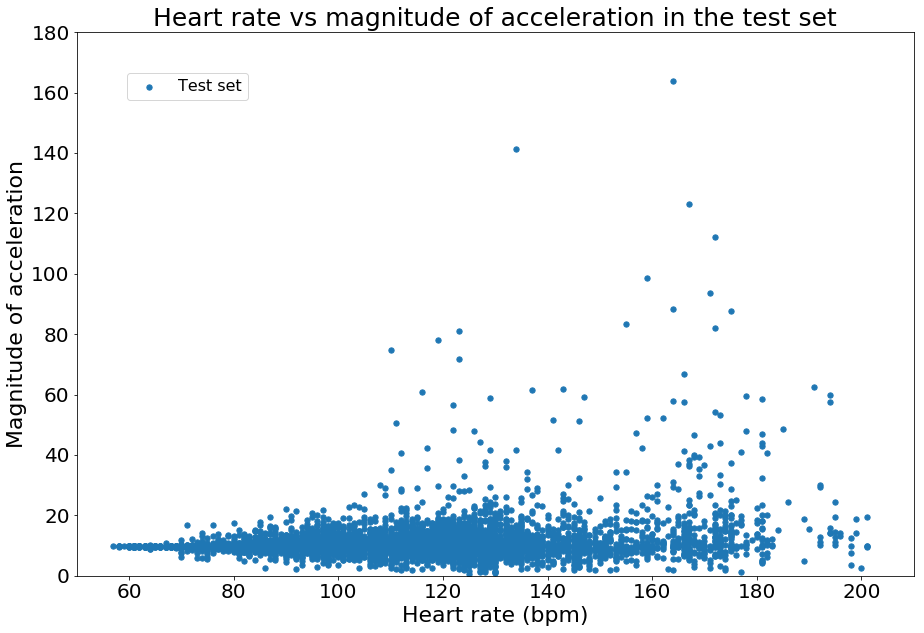

In [12]:
#########################################################################
# Plot of data set
#
# Here I plot the heart rate vs. the magnitude of acceleration vector for
# the points in the ML test set
#

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111,)

ax1.set_title('Heart rate vs magnitude of acceleration in the test set',fontsize=25)
ax1.set_xlabel('Heart rate (bpm)',fontsize=22)
ax1.set_ylabel('Magnitude of acceleration',fontsize=22)
#ax1.set_xticklabels(fontsize=12)
ax1.tick_params(labelsize=20)

#
# Prepare x and y data to plot
#
x_heart_rate_test = X_test[:,1]
y_acc_mag_test = np.linalg.norm(X_test[:,2:5],axis=1)

ax1.scatter(x_heart_rate_test,y_acc_mag_test, s=28, label='Test set')


lgd = plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.90),fontsize = 16)
ax1.set_ylim(0,180)
ax1.set_xlim(50,210)

#txt = plt.text(55,120,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy ='+ "{:.2f}".format(recall * float(100))+ ' %', fontsize = 16)
plt.savefig('plot1.jpg',dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

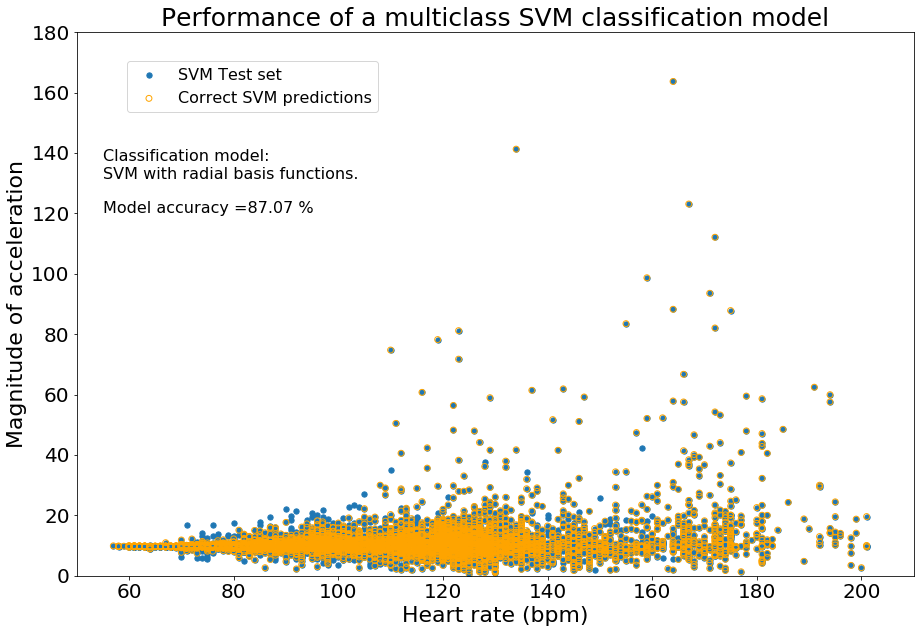

In [13]:
#########################################################################
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111,)

ax1.set_title('Performance of a multiclass SVM classification model',fontsize=25)

ax1.set_xlabel('Heart rate (bpm)',fontsize=22)
ax1.set_ylabel('Magnitude of acceleration',fontsize=22)
#ax1.set_xticklabels(fontsize=12)
ax1.tick_params(labelsize=20)


#
# Prepare x and y data to plot
#
x_heart_rate_test = X_test[:,1]
x_heart_rate_correct = X_correct[:,1]

y_acc_mag_test = np.linalg.norm(X_test[:,2:5],axis=1)
y_acc_mag_correct = np.linalg.norm(X_correct[:,2:5],axis=1)

ax1.scatter(x_heart_rate_test,y_acc_mag_test, s=28, label='SVM Test set')
ax1.scatter(x_heart_rate_correct,y_acc_mag_correct,linewidth = 1., facecolors='none',\
           edgecolor='orange', s=35,label='Correct SVM predictions')

#ax1.scatter(X_test[:,1],np.linalg.norm(X_test[:,2:5],axis=1), s=23, label='SVM Test set')
#ax1.scatter(X_correct[:,1],np.linalg.norm(X_correct[:,2:5],axis=1),linewidth = 0.9, facecolors='none',\
#           edgecolor='orange', s=30,label='Correct SVM predictions')


lgd = plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.90),fontsize = 16)
ax1.set_ylim(0,180)
ax1.set_xlim(50,210)

txt = plt.text(55,120,'\nClassification model:\nSVM with radial basis functions.\n\nModel accuracy ='+ "{:.2f}".format(recall * float(100))+ ' %', fontsize = 16)
plt.savefig('plot2.jpg',dpi=300,bbox_extra_artists=(lgd,txt), bbox_inches='tight')
plt.show()